Variables

In [1]:
SCALINGS = 4e-4
SFREQ = 500
WINDOW_SIZE = 1

Importing all packages

In [93]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy.fft import fft
import time
import mne
import matplotlib
import tk
import matplotlib.pyplot as plt
import os
from scipy.stats import kurtosis, zscore
from mne.preprocessing import create_ecg_epochs, create_eog_epochs, read_ica
from mne.time_frequency import tfr_morlet, tfr_array_morlet, morlet, AverageTFR
from itertools import product
# import pywt
from scipy.signal import hilbert
from mne_connectivity import spectral_connectivity_epochs
from mne_connectivity.viz import plot_sensors_connectivity
import networkx as nx

matplotlib.use('TkAgg')

### Plots

#### Time amplitude plot

In [3]:
def time_amplitude(raw):
    fig = raw.plot(
        n_channels=32, 
        scalings=SCALINGS
        )
    print(raw.info)

#### Power spectral density plot

In [4]:
def psd(raw):
    fig = raw.plot_psd(picks=raw.info['ch_names'])

### Preprocessing

1. Band pass filtering

In [5]:
def band_pass_filter(raw_cleaned):
    l_freq = 0.01
    h_freq = 45
    raw_cleaned.filter(method= 'fir',
        phase= 'minimum',
        fir_window= 'hann',
        l_freq= l_freq,
        h_freq= h_freq)
    # time_amplitude(raw_cleaned)
    # psd(raw_cleaned)
    return raw_cleaned

2. Rereferencing

Calculates the mean voltage from all electrodes at each time point and subtracts this mean from the voltage at each individual electrode.

In [6]:
def rereferencing(raw_cleaned):
    raw_cleaned.set_eeg_reference('average', projection=True).apply_proj() 
    # time_amplitude(raw_cleaned)
    # psd(raw_cleaned)
    return raw_cleaned


MDD data

In [7]:
file_path = os.getcwd()+ '/MDD EC EEG/'
print(file_path)
items = os.listdir(file_path)
raw_MDD = []
raw_info = []
for item in items:
    raw = mne.io.read_raw_edf(file_path+item, preload=True)
    raw.crop(tmin=5, tmax=105)
    print(len(raw.get_data()[0]))
    raw_info.append(raw.info['ch_names'])
    raw = band_pass_filter(raw)
    raw = rereferencing(raw)
    raw_MDD.append(raw.get_data())

/home/vishwani/Downloads/Depression-IITD/MDD EC EEG/
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS32EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (310.004 s)



/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS17EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS29EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS26EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS19EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS34EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS18EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS10EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS21EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS22EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS25EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS6EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS23EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS1EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS33EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76287  =      0.000 ...   297.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS31EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS11EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS3EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS7EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS28EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS13EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS30EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 61695  =      0.000 ...   240.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS2EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76031  =      0.000 ...   296.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS27EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS14EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS24EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS15EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS20EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76543  =      0.000 ...   298.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/MDD EC EEG/MDDS9EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
25601
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (3

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...


In [8]:
for i in range(len(raw_info)-1):
    print(raw_info[i]==raw_info[i+1])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
info = raw.info
print(raw.info)
print(len(raw_MDD))
raw_MDD = np.mean(raw_MDD, axis=0)
raw_MDD = mne.io.RawArray(raw_MDD, info)

<Info | 9 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2013-06-12 12:02:45 UTC
 nchan: 20
 projs: Average EEG reference: on
 sfreq: 256.0 Hz
 subject_info: 4 items (dict)
>
29
Creating RawArray with float64 data, n_channels=20, n_times=25601
    Range : 0 ... 25600 =      0.000 ...   100.000 secs
Ready.


Control data

In [10]:
file_path = os.getcwd()+ '/Healthy EC EEG/'
items = os.listdir(file_path)
raw_control = []
raw_info = []
for item in items:
    raw = mne.io.read_raw_edf(file_path+item, preload=True)
    if(len(raw.info['ch_names']) == 20):
        raw.crop(tmin=5, tmax=105)
        raw_info.append(raw.info['ch_names'])
        raw = band_pass_filter(raw)
        raw = rereferencing(raw)
        raw_control.append(raw.get_data())
        info = raw.info


Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS3EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS29EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77567  =      0.000 ...   302.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS10EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 96255  =      0.000 ...   375.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS22EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Extracting EDF parameters from /home/vish

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS6EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS30EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass f

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS8EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS20EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 78591  =      0.000 ...   306.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS7EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS23EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS17EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 79103  =      0.000 ...   308.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS16EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Readin

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS25EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, non-linear phase, causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hann window with 0.0546 passband ripple and 44 dB stopband attenuation
- Lower transition bandwidth: 0.01 Hz
- Upper transition bandwidth: 11.25 Hz
- Filter length: 79361 samples (310.

/tmp/ipykernel_7280/3104601717.py:4: RuntimeWarning: filter_length (79361) is longer than the signal (25601), distortion is likely. Reduce filter length or filter a longer signal.
  raw_cleaned.filter(method= 'fir',


EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS28EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS4EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...
Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS11EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading

In [11]:
for i in range(len(raw_info)-1):
    print(raw_info[i]==raw_info[i+1])

True
True
True
True


In [12]:
print(info)
raw_control = np.mean(raw_control, axis=0)
raw_control = mne.io.RawArray(raw_control, info)

<Info | 9 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2013-04-22 10:46:31 UTC
 nchan: 20
 projs: Average EEG reference: on
 sfreq: 256.0 Hz
 subject_info: 4 items (dict)
>
Creating RawArray with float64 data, n_channels=20, n_times=25601
    Range : 0 ... 25600 =      0.000 ...   100.000 secs
Ready.


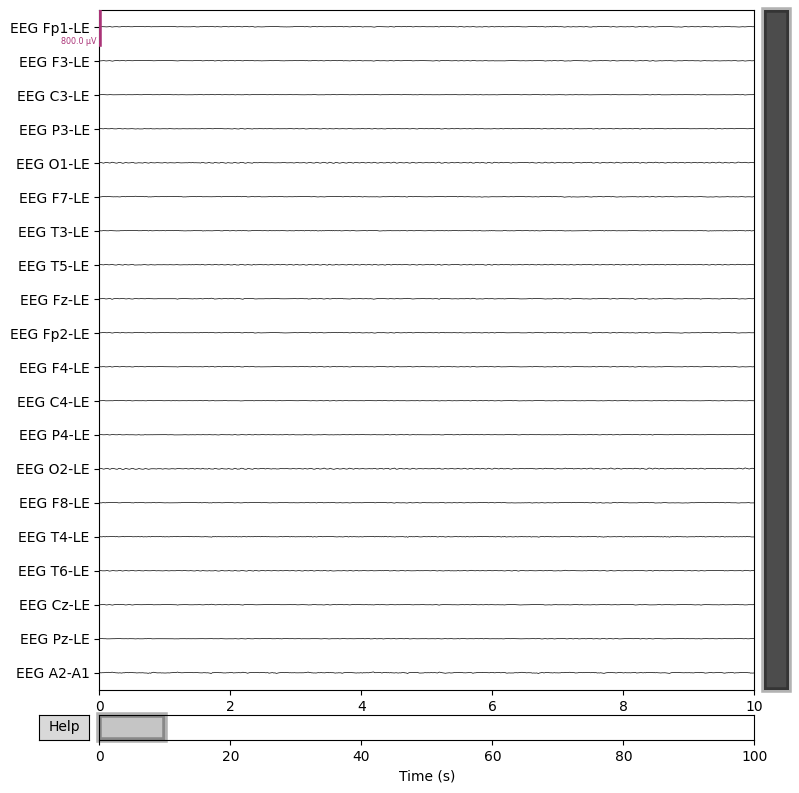

<Info | 9 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2013-04-22 10:46:31 UTC
 nchan: 20
 projs: Average EEG reference: on
 sfreq: 256.0 Hz
 subject_info: 4 items (dict)
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/tmp/ipykernel_7280/2063290540.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  fig = raw.plot_psd(picks=raw.info['ch_names'])
/home/vishwani/.local/lib/python3.8/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


In [14]:
# time_amplitude(raw_MDD)
# psd(raw_MDD)
time_amplitude(raw_control)
psd(raw_control)

Save files

In [17]:
# mne.export.export_raw("rawMDDOnline20chans", raw_MDD)
# mne.export.export_raw("rawControlOnline20chans", raw_control)

### 1. PSD graph plot between MDD and Control group

For resting state EEG channel, analyzing the overall average power across channels provides a holistic view of the brain's activity without emphasizing the specificity of individual channels.

1.1 Comparison between MDD vs Control group PSD's for average of all channels

Assuming alpha2 (10-13Hz) and theta (4-8Hz)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


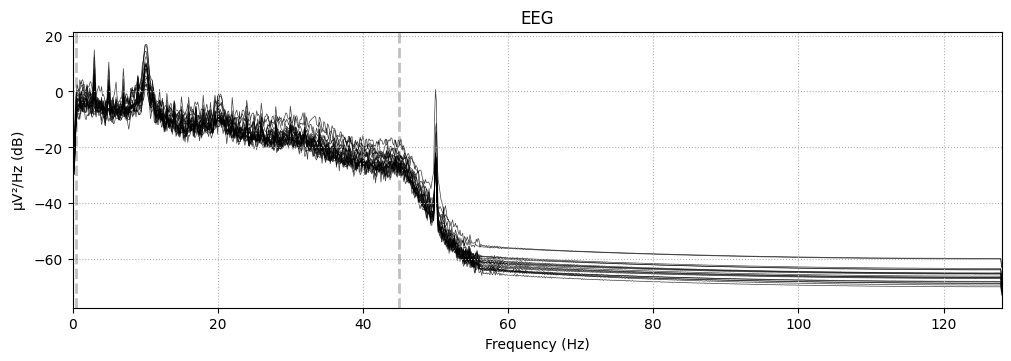

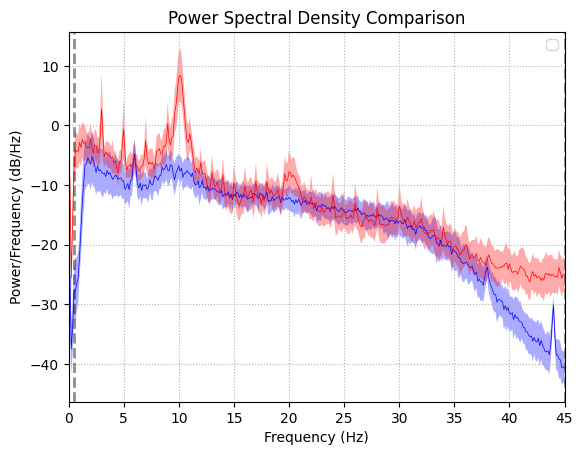

In [18]:
fmin=0.01
fmax=45

fig, ax = plt.subplots()
raw_MDD.plot_psd(picks=raw_MDD.info['ch_names'], average=True, fmax=fmax, ax=ax, show=False, color='blue')
raw_control.plot_psd(picks=raw_control.info['ch_names'], average=True, fmax=fmax, ax=ax, show=False, color='red')

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power/Frequency (dB/Hz)')
ax.set_title('Power Spectral Density Comparison')
ax.legend()
plt.show()

# labels = np.arange(0, fmax)
# psd_MDD, frequencies = mne.time_frequency.psd_array_welch(raw_MDD.get_data(), fmin=fmin, fmax=fmax, sfreq=SFREQ)
# psd_control, frequencies = mne.time_frequency.psd_array_welch(raw_control.get_data(), fmin=0.01, fmax=45, sfreq=SFREQ)

# avg_abs_power_MDD, avg_abs_power_control = np.mean(np.abs(psd_MDD), axis=0), np.mean(np.abs(psd_control), axis=0) 

# plt.figure()
# plt.plot(frequencies, avg_abs_power_MDD, color='blue')
# plt.plot(frequencies, avg_abs_power_control, color='red')
# plt.title('Average Absolute Power')
# plt.xlabel('Frequency (Hz)')
# plt.xticks(labels, labels, rotation ='vertical') 
# plt.ylabel('Power')
# plt.show()

### 2. Epoching

In [19]:
duration = 4.0
overlap = 2.0 

samples_per_epoch = int(duration * SFREQ)
samples_per_overlap = int(overlap * SFREQ)

# Manually created events
start, stop = 0, samples_per_epoch
events = []
while stop <= len(raw_MDD): # TODO: raw_MDD length == raw_control length cross check!
    events.append([start, 0, 1]) 
    start += samples_per_overlap
    stop += samples_per_overlap

events = np.array(events)

2.1 Segmenting epochs for MDD

Not setting metadata
24 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 24 events and 1025 original time points ...
0 bad epochs dropped


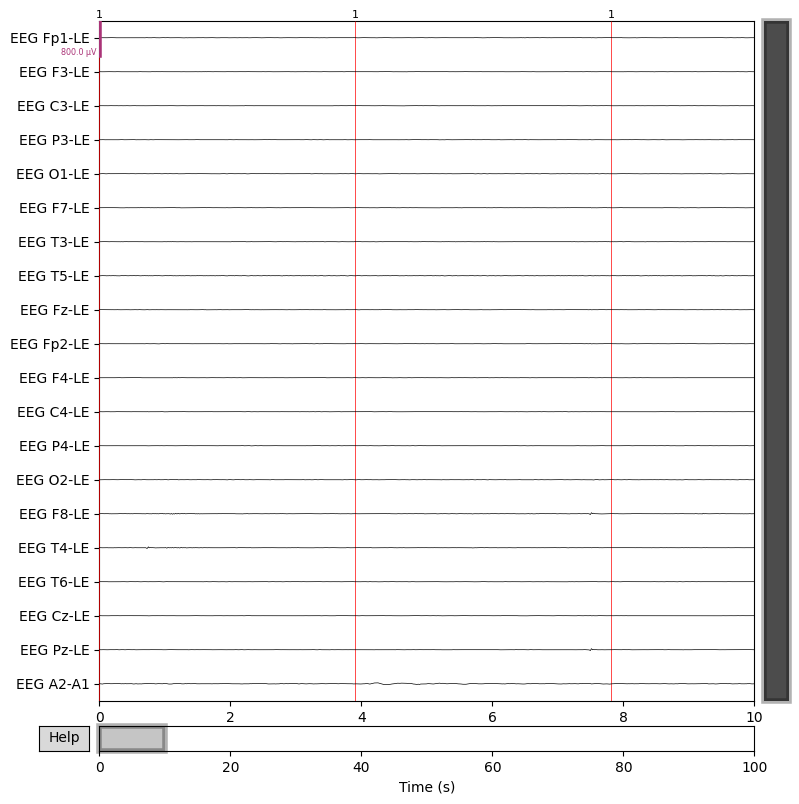

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


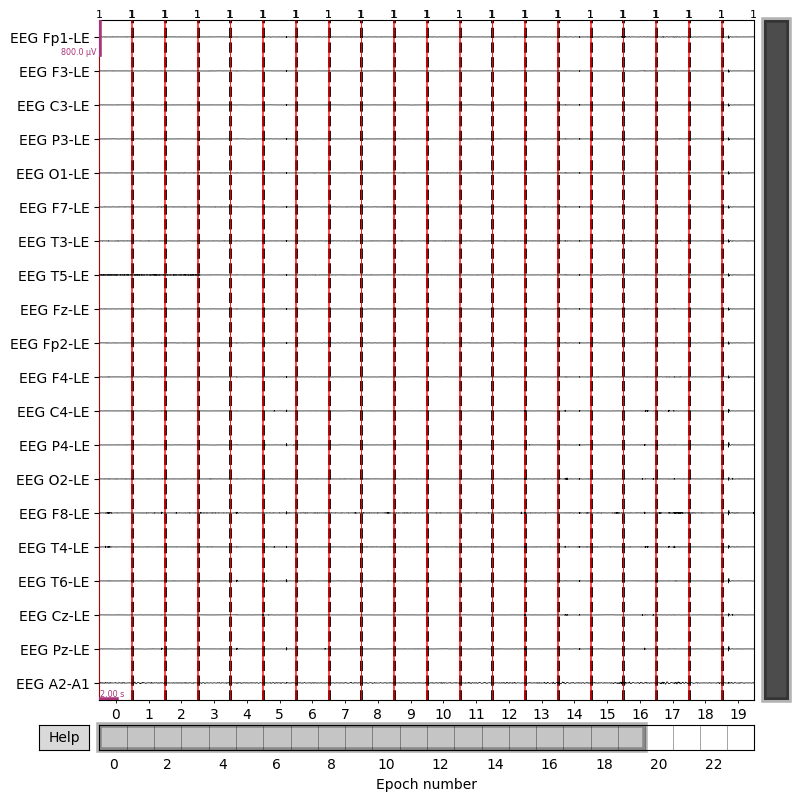

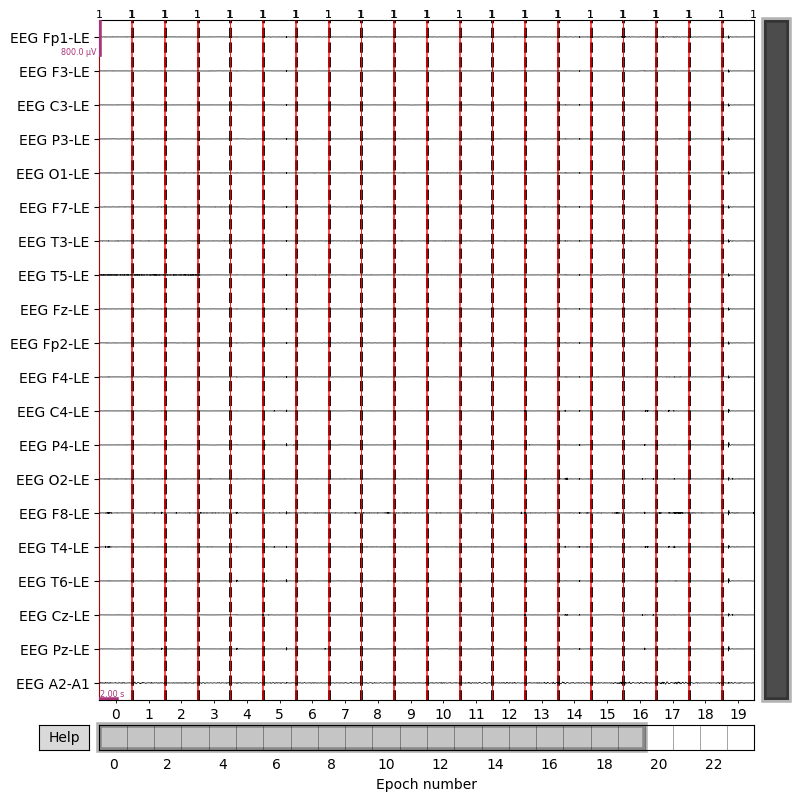

In [22]:
epochs_MDD = mne.Epochs(raw_MDD, events, tmin=0, tmax=duration, baseline=None, detrend=1,
                    picks=None, preload=True, reject=None)
raw_MDD.plot(n_channels=len(raw_MDD.info['ch_names']), events=events, event_color={1:'r'}, scalings=SCALINGS)
epochs_MDD.plot(n_channels=len(raw_MDD.info['ch_names']), event_color={1:'r'}, events=events, scalings=SCALINGS)

2.2 Segmenting epochs for control

Not setting metadata
24 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 24 events and 1025 original time points ...
0 bad epochs dropped


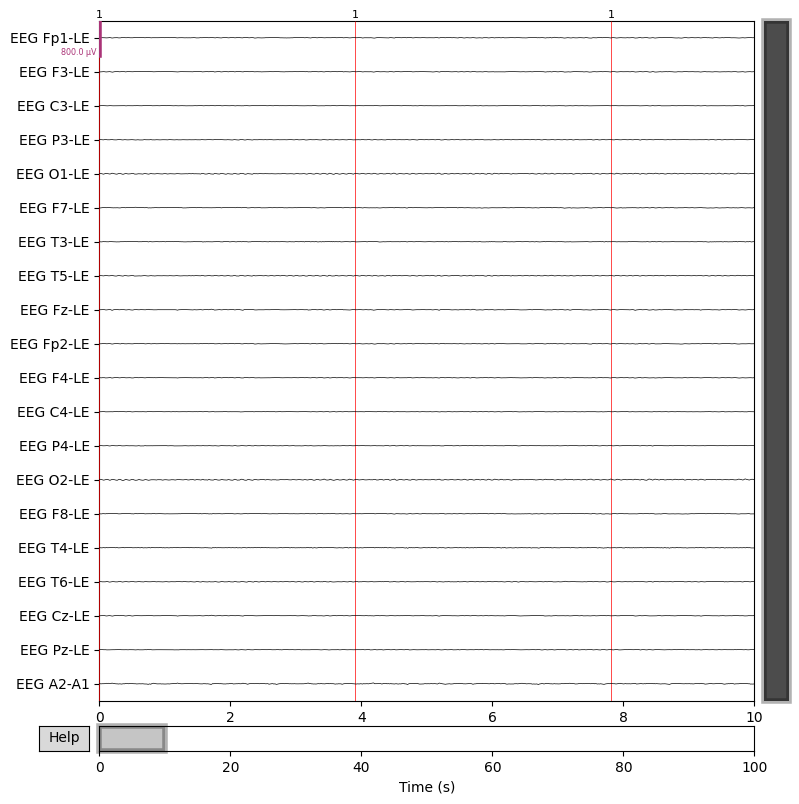

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.


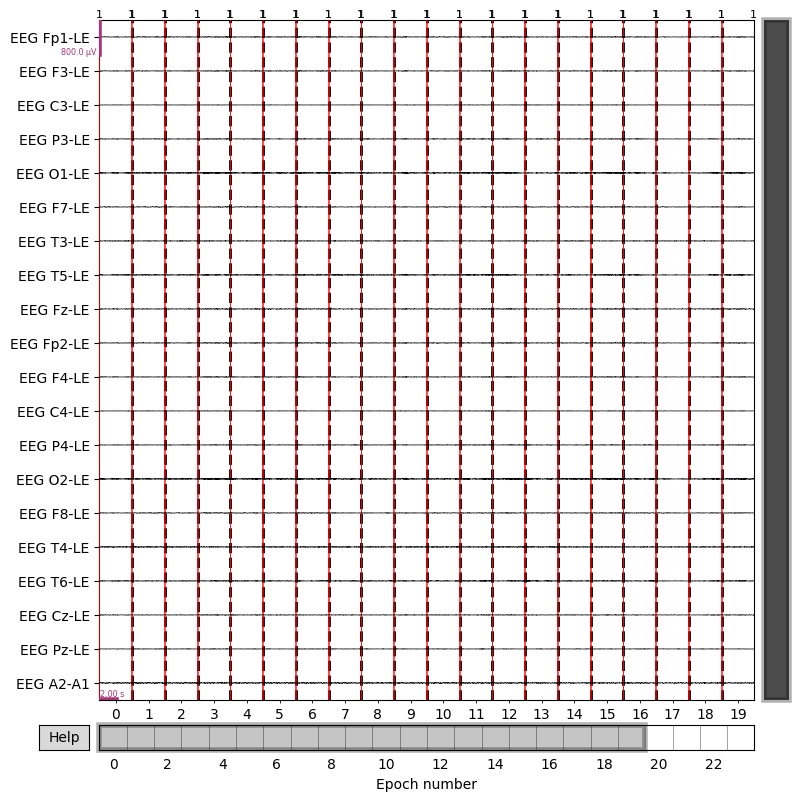

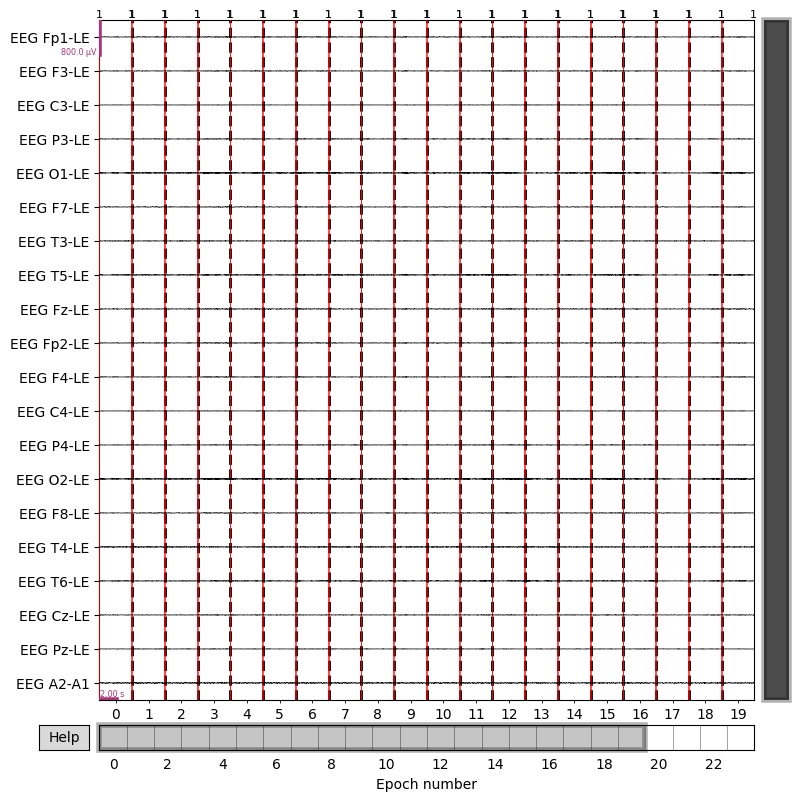

In [23]:
epochs_control = mne.Epochs(raw_control, events, tmin=0, tmax=duration, baseline=None, detrend=1,
                    picks=None, preload=True, reject=None)
raw_control.plot(n_channels=len(raw_MDD.info['ch_names']), events=events, event_color={1:'r'}, scalings=SCALINGS)
epochs_control.plot(n_channels=len(raw_MDD.info['ch_names']), event_color={1:'r'}, events=events, scalings=SCALINGS)

### 3. PLI and construction of brain function matrices

In [25]:
freq_bands = [(4,8), (8, 10), (10,13)]
mapping = {0: 'theta', 1: 'alpha1', 2: 'alpha2'}
connectivity = {}

In [26]:
def connectivity_matrix(epochs, i):
    return spectral_connectivity_epochs(
    epochs, method='pli', mode='multitaper', sfreq=SFREQ,
    fmin=freq_bands[i][0], fmax=freq_bands[i][1], faverage=True, n_jobs=1)


In [27]:
n_channels = len(raw_MDD.info['ch_names'])
for i in range(len(freq_bands)):
    con = connectivity_matrix(epochs_MDD, i)
    connectivity[f'MDD-{mapping[i]}'] = con.get_data().reshape((n_channels, n_channels))

    con = connectivity_matrix(epochs_control, i)
    connectivity[f'Control-{mapping[i]}'] = con.get_data().reshape((n_channels, n_channels))

    # Make matrix symmetric
    for row in range(n_channels):
        for col in range(n_channels):
            connectivity[f'MDD-{mapping[i]}'][row][col] = connectivity[f'MDD-{mapping[i]}'][col][row]
            connectivity[f'Control-{mapping[i]}'][row][col] = connectivity[f'Control-{mapping[i]}'][col][row]   

Adding metadata with 3 columns
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 190 connections
    using t=0.000s..4.000s for estimation (1025 points)
    frequencies: 4.2Hz..8.0Hz (16 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
    computing connectivity for epoch 9
    computing connectivity for epoch 10
    computing connectivity for epoch 11
    computing connectivity for epoch 12
    computing connectivity for epoch 13
    computing connectivity for epoch 14
    computing connectivity for epo

In [28]:
print((connectivity.keys()))

dict_keys(['MDD-theta', 'Control-theta', 'MDD-alpha1', 'Control-alpha1', 'MDD-alpha2', 'Control-alpha2'])


In [ ]:
# # ALTERNATIVE: PLI calculation in Raw Python

# def calculate_pli(data):
#     # data = EEG data of channel Ci and Cj for 1 epoch (2000 data points (4s X 500fs))
#     analytic_signal = hilbert(data)
#     instantaneous_phase = np.angle(analytic_signal)
#     return np.abs(np.mean(np.sign(np.diff(instantaneous_phase, axis=0))))

# fun_connectivity = []
# for k in range(len(epochs)):
#     pli_matrix = [[0 for i in range(len(raw_cleaned.info['ch_names']))] for j in range(len(raw_cleaned.info['ch_names']))]
#     for i in range(len(raw_cleaned.info['ch_names'])):
#         for j in range(i+1, len(raw_cleaned.info['ch_names'])):
#             pli_matrix[i][j] = pli_matrix[j][i] = calculate_pli([epochs[k].get_data(fmin = freq_bands[0][0], fmax=freq_bands[-1][-1])[0][i], epochs[k].get_data(fmin = freq_bands[0][0], fmax=freq_bands[-1][-1])[0][j]])

#     fun_connectivity.append(pli_matrix)
# conn = np.mean(fun_connectivity, axis=0)

### 4. Small World Index 

In [29]:
def calculate_small_world_properties(matrix):
    matrix = nx.from_numpy_array(matrix)
    Lw = nx.average_shortest_path_length(matrix, weight='weight')
    Cw = nx.average_clustering(matrix, weight='weight')
    return (Cw, Lw)

### 5. Binarization on functional connectivity matrices

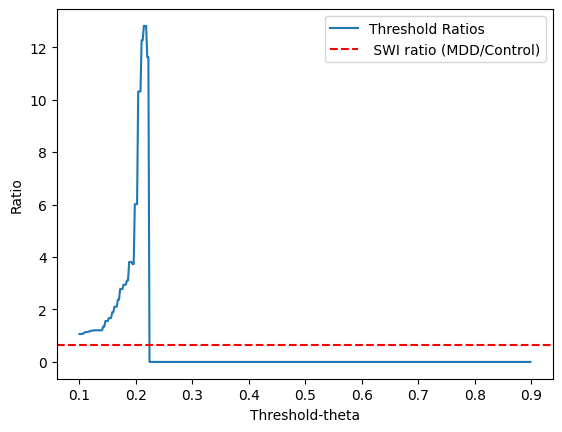

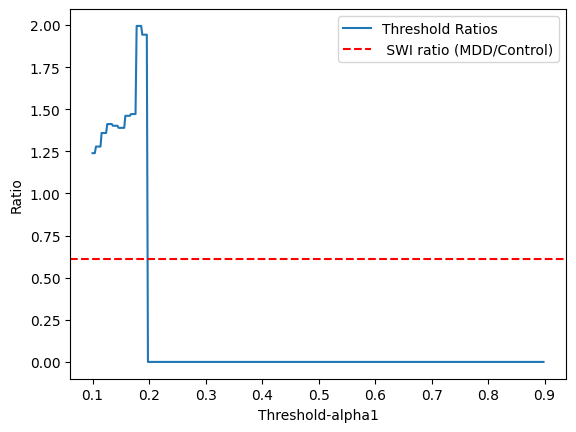

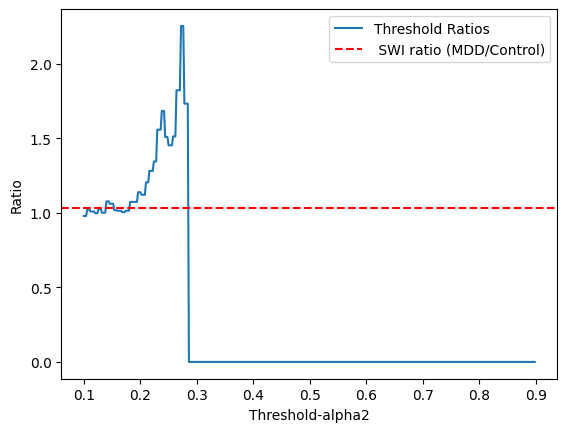

{'theta': 0.2140000000000001, 'alpha1': 0.17800000000000007, 'alpha2': 0.27200000000000013}


In [30]:
optimal_threshold = {}
for i in range(len(freq_bands)):
    Cw_MDD, Lw_MDD = calculate_small_world_properties(connectivity[f'MDD-{mapping[i]}'])
    Cw_control, Lw_control = calculate_small_world_properties(connectivity[f'Control-{mapping[i]}'])

    # Generating 50 random networks with same number of vertices and edges 
    random_networks = [nx.gnm_random_graph(n_channels, 496) for _ in range(50)]
    Crand = np.mean([nx.average_clustering(G) for G in random_networks])
    Lrand = np.mean([nx.average_shortest_path_length(G) for G in random_networks])

    small_world_index_MDD =  (Cw_MDD/Crand)/(Lw_MDD/Lrand)
    small_world_index_control = (Cw_control/Crand)/(Lw_control/Lrand)

    thresholds = np.arange(0.1, 0.9, 0.002)
    swi_ratio = small_world_index_MDD/small_world_index_control

    ratios = []
    for threshold in thresholds:
        binarized_MDD = connectivity[f'MDD-{mapping[i]}'] > threshold
        binarized_control = connectivity[f'Control-{mapping[i]}'] > threshold

        # TODO: Cross check should we ignore thresholds which result in matrix to be not connected ?
        if nx.is_connected(nx.from_numpy_array(binarized_MDD)) and nx.is_connected(nx.from_numpy_array(binarized_control)):
            Cw_MDD_binarized, Lw_MDD_binarized = calculate_small_world_properties(binarized_MDD)
            Cw_control_binarized, Lw_control_binarized = calculate_small_world_properties(binarized_control)

            swi_binarized_MDD =  (Cw_MDD_binarized/Crand)/(Lw_MDD_binarized/Lrand)
            swi_binarized_control = (Cw_control_binarized/Crand)/(Lw_control_binarized/Lrand)
            
            swi_ratio_binarized =  swi_binarized_MDD/swi_binarized_control
            ratios.append(swi_ratio_binarized)
        else:
            ratios.append(0.0)

    optimal_threshold[mapping[i]] = thresholds[np.argmax(np.abs(ratios - swi_ratio))]

    # _, p_value = mne.stats.ttest_ind_no_p(connectivity[f'MDD-{mapping[i]}'], connectivity[f'Control-{mapping[i]}'])
    # if p_value < 0.001:
    #     print(f"Optimal Threshold: {optimal_threshold} (Significant)")

    plt.plot(thresholds, ratios, label='Threshold Ratios')
    plt.axhline(swi_ratio, color='red', linestyle='--', label=' SWI ratio (MDD/Control)')
    plt.xlabel(f'Threshold-{mapping[i]}')
    plt.ylabel('Ratio')
    plt.legend()
    plt.show()
print(optimal_threshold)

In [31]:
binarized_matrix = {}
for i in range(len(freq_bands)):
    binarized_matrix[f'MDD-{mapping[i]}'] = connectivity[f'MDD-{mapping[i]}'] > optimal_threshold[mapping[i]]
    binarized_matrix[f'Control-{mapping[i]}'] = connectivity[f'Control-{mapping[i]}'] > optimal_threshold[mapping[i]]

In [32]:
print(binarized_matrix.keys())

dict_keys(['MDD-theta', 'Control-theta', 'MDD-alpha1', 'Control-alpha1', 'MDD-alpha2', 'Control-alpha2'])


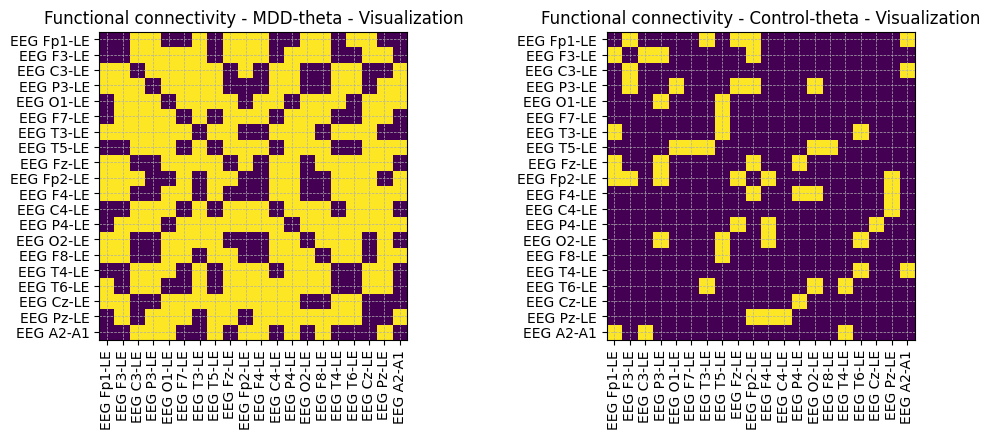

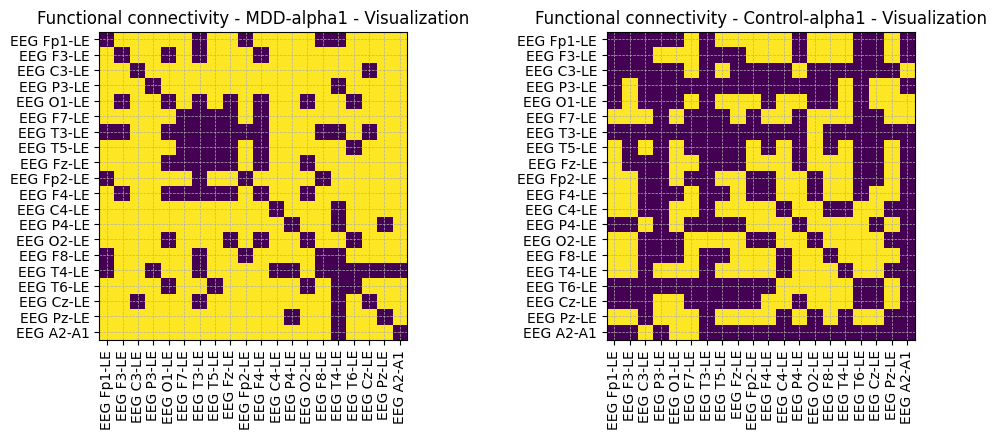

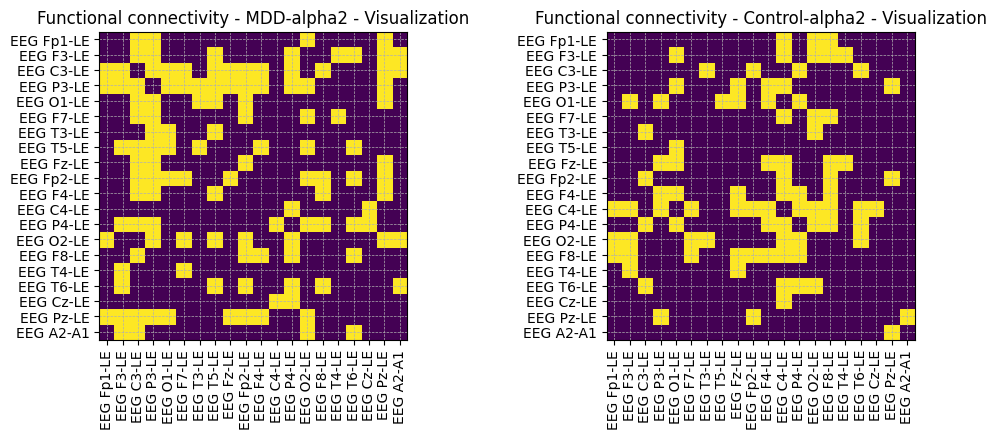

In [33]:
# Yellow - Higher synchronisation
for i in range(len(binarized_matrix)//2):
    # i = 0, 1, 2
    plt.figure(figsize=(12, 4))
    for j in range(2):
        # j = 0, 1
        plt.subplot(1, 2, j+1)
        plt.imshow(list(binarized_matrix.values())[2*i+j], interpolation='none')
        plt.title(f'Functional connectivity - {list(binarized_matrix)[2*i+j]} - Visualization')
        plt.xticks([_ for _ in range(n_channels)], raw_MDD.info['ch_names'], rotation='vertical')
        plt.yticks([_ for _ in range(n_channels)], raw_MDD.info['ch_names'], rotation='horizontal')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

### 6. Difference matrix

In [34]:
def return_index(channels_list):
    indexes = []
    for channel in channels_list:
        for i in range(len(raw_MDD.info['ch_names'])):
            if raw_MDD.info['ch_names'][i]==channel:
                indexes.append(i)
    return(indexes)

In [35]:
raw_MDD.info['ch_names']
central_channels = return_index(['Pz', 'Oz', 'Fz'])
central_channels

[]

In [61]:
edf_file = os.getcwd() + '/Healthy EC EEG/HS1EC.edf' 
x = mne.io.read_raw_edf(edf_file)

print(x.info['ch_names'])

montage = x.get_montage()
print(montage)

Extracting EDF parameters from /home/vishwani/Downloads/Depression-IITD/Healthy EC EEG/HS1EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
None


In [84]:
all_channels = ['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1',]
mpp = {}
for i in range(len(all_channels)):
    mpp[all_channels[i]] = all_channels[i].split(' ')[1].split('-')[0]
print(mpp)
mne.rename_channels(raw_control.info, mpp)
mne.rename_channels(raw_MDD.info, mpp)
mne.rename_channels(epochs_control.info, mpp)
mne.rename_channels(epochs_MDD.info, mpp)

{'EEG Fp1-LE': 'Fp1', 'EEG F3-LE': 'F3', 'EEG C3-LE': 'C3', 'EEG P3-LE': 'P3', 'EEG O1-LE': 'O1', 'EEG F7-LE': 'F7', 'EEG T3-LE': 'T3', 'EEG T5-LE': 'T5', 'EEG Fz-LE': 'Fz', 'EEG Fp2-LE': 'Fp2', 'EEG F4-LE': 'F4', 'EEG C4-LE': 'C4', 'EEG P4-LE': 'P4', 'EEG O2-LE': 'O2', 'EEG F8-LE': 'F8', 'EEG T4-LE': 'T4', 'EEG T6-LE': 'T6', 'EEG Cz-LE': 'Cz', 'EEG Pz-LE': 'Pz', 'EEG A2-A1': 'A2'}


ValueError: Invalid channel name(s) {'EEG F7-LE', 'EEG Fz-LE', 'EEG P4-LE', 'EEG F4-LE', 'EEG Fp1-LE', 'EEG T4-LE', 'EEG F8-LE', 'EEG Cz-LE', 'EEG T3-LE', 'EEG Pz-LE', 'EEG C4-LE', 'EEG F3-LE', 'EEG P3-LE', 'EEG Fp2-LE', 'EEG A2-A1', 'EEG T5-LE', 'EEG T6-LE', 'EEG O1-LE', 'EEG C3-LE', 'EEG O2-LE'} are not present in info

******* [<DigPoint |        LPA : (-80.6, -29.1, -41.3) mm  : MRI (surface RAS) frame>, <DigPoint |     Nasion : (1.5, 85.1, -34.8) mm     : MRI (surface RAS) frame>, <DigPoint |        RPA : (84.4, -28.5, -41.3) mm   : MRI (surface RAS) frame>, <DigPoint |     EEG #1 : (-29.4, 83.9, -7.0) mm    : MRI (surface RAS) frame>, <DigPoint |     EEG #3 : (29.9, 84.9, -7.1) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #16 : (-70.3, 42.5, -11.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #18 : (-50.2, 53.1, 42.2) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #20 : (0.3, 58.5, 66.5) mm      : MRI (surface RAS) frame>, <DigPoint |    EEG #22 : (51.8, 54.3, 40.8) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #24 : (73.0, 44.4, -12.0) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #40 : (-65.4, -11.6, 64.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #42 : (0.4, -9.2, 100.2) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #44 : (67.1, -10.9, 63.6

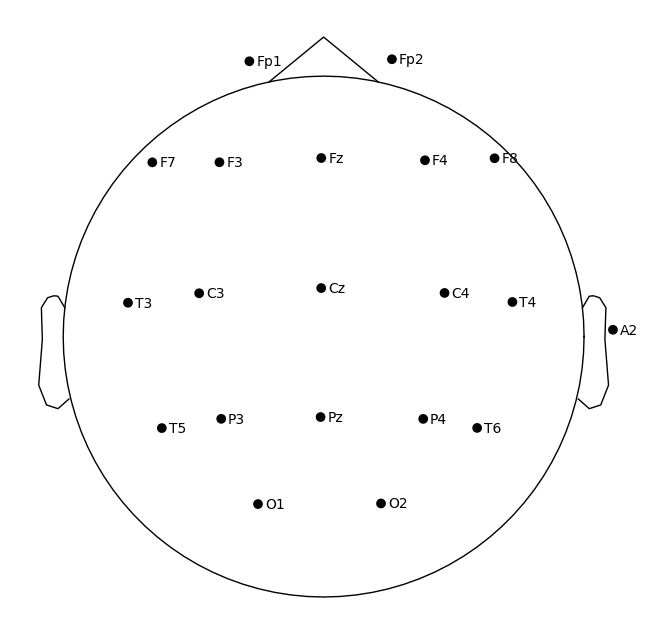

In [79]:
def set_montage(raw):
    mont1020 = mne.channels.make_standard_montage('standard_1020')
    mont1005 = mne.channels.make_standard_montage('standard_1005')

    ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in list(mpp.values())]
    mont1020_new = mont1020.copy()

    mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
    kept_channel_info = [mont1020.dig[x+3] for x in ind]

    # Keeping the first three rows as they are the fiducial points information
    mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info

    raw.set_montage(mont1020_new)
    mont1020_new.plot()

******* [<DigPoint |        LPA : (-80.6, -29.1, -41.3) mm  : MRI (surface RAS) frame>, <DigPoint |     Nasion : (1.5, 85.1, -34.8) mm     : MRI (surface RAS) frame>, <DigPoint |        RPA : (84.4, -28.5, -41.3) mm   : MRI (surface RAS) frame>, <DigPoint |     EEG #1 : (-29.4, 83.9, -7.0) mm    : MRI (surface RAS) frame>, <DigPoint |     EEG #3 : (29.9, 84.9, -7.1) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #16 : (-70.3, 42.5, -11.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #18 : (-50.2, 53.1, 42.2) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #20 : (0.3, 58.5, 66.5) mm      : MRI (surface RAS) frame>, <DigPoint |    EEG #22 : (51.8, 54.3, 40.8) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #24 : (73.0, 44.4, -12.0) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #40 : (-65.4, -11.6, 64.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #42 : (0.4, -9.2, 100.2) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #44 : (67.1, -10.9, 63.6

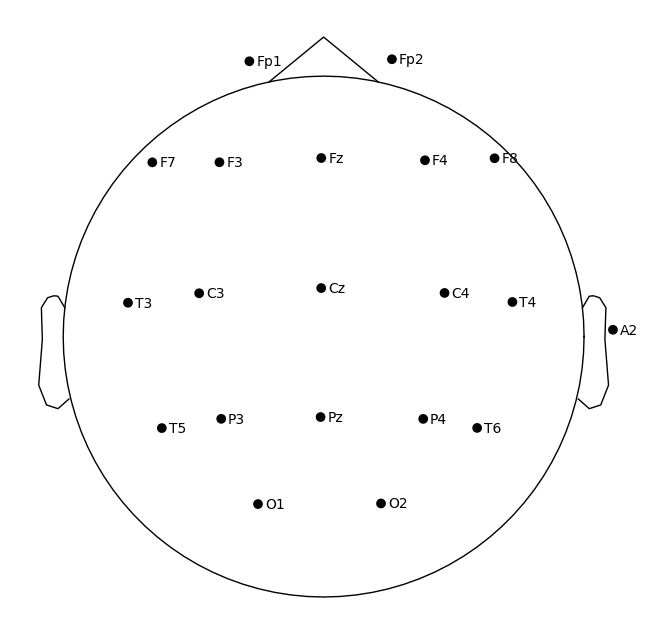

******* [<DigPoint |        LPA : (-80.6, -29.1, -41.3) mm  : MRI (surface RAS) frame>, <DigPoint |     Nasion : (1.5, 85.1, -34.8) mm     : MRI (surface RAS) frame>, <DigPoint |        RPA : (84.4, -28.5, -41.3) mm   : MRI (surface RAS) frame>, <DigPoint |     EEG #1 : (-29.4, 83.9, -7.0) mm    : MRI (surface RAS) frame>, <DigPoint |     EEG #3 : (29.9, 84.9, -7.1) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #16 : (-70.3, 42.5, -11.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #18 : (-50.2, 53.1, 42.2) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #20 : (0.3, 58.5, 66.5) mm      : MRI (surface RAS) frame>, <DigPoint |    EEG #22 : (51.8, 54.3, 40.8) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #24 : (73.0, 44.4, -12.0) mm    : MRI (surface RAS) frame>, <DigPoint |    EEG #40 : (-65.4, -11.6, 64.4) mm   : MRI (surface RAS) frame>, <DigPoint |    EEG #42 : (0.4, -9.2, 100.2) mm     : MRI (surface RAS) frame>, <DigPoint |    EEG #44 : (67.1, -10.9, 63.6

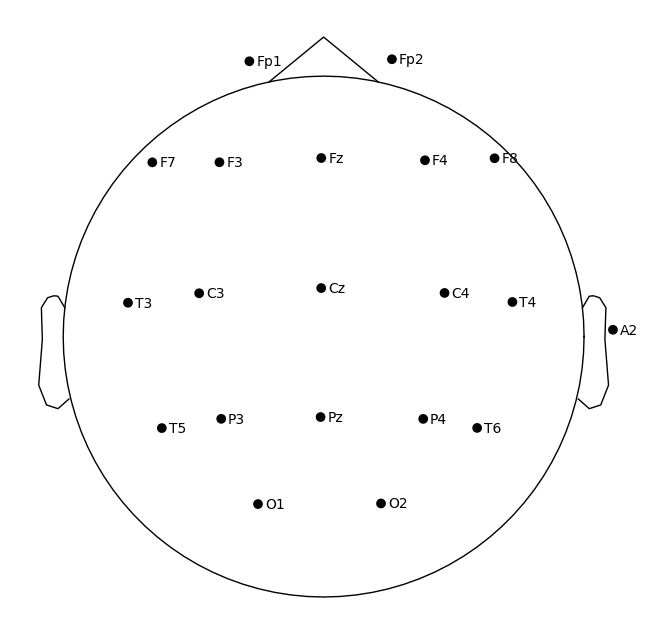

In [86]:
set_montage(raw_MDD)
set_montage(raw_control)
set_montage(epochs_MDD)
set_montage(epochs_control)

In [112]:
print(epochs_control.info)
# binarized_matrix[f'MDD-{mapping[0]}'].astype(int)

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fz, Fp2, F4, C4, P4, O2, F8, ...
 chs: 20 EEG
 custom_ref_applied: False
 dig: 23 items (3 Cardinal, 20 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2013-04-22 10:46:31 UTC
 nchan: 20
 projs: Average EEG reference: on
 sfreq: 256.0 Hz
 subject_info: 4 items (dict)
>


In [124]:
matplotlib.use('TkAgg')

In [125]:
difference_matrix = {}
for i in range(len(freq_bands)):
    # TODO: How to calculate difference_matrix XOR or True - False = True only ?
    difference_matrix[mapping[i]] = (binarized_matrix[f'MDD-{mapping[i]}'].astype(int) - binarized_matrix[f'Control-{mapping[i]}'].astype(int))
    for k in range(n_channels):
        for l in range(n_channels):
            if k in central_channels or l in central_channels or difference_matrix[mapping[i]][k][l] == -1:
                difference_matrix[mapping[i]][k][l] = 0

    # Yellow - Higher synchronisation
    for i in range(len(difference_matrix)//2):
        # i = 0, 1, 2
        plt.figure(figsize=(12, 4))
        for j in range(2):
            # j = 0, 1
            plt.subplot(1, 2, j+1)
            plt.imshow(list(binarized_matrix.values())[2*i+j], interpolation='none')
            plt.title(f'Functional connectivity - {list(binarized_matrix)[2*i+j]} - Visualization')
            plt.xticks([_ for _ in range(n_channels)], raw_MDD.info['ch_names'], rotation='vertical')
            plt.yticks([_ for _ in range(n_channels)], raw_MDD.info['ch_names'], rotation='horizontal')
            plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.show()

    print(difference_matrix[mapping[i]])
    plot_sensors_connectivity(
        epochs_control.info,
        difference_matrix[mapping[i]],
        cbar_label=f'{mapping[i]}-Connectivity'
        )

[[0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0]
 [1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0]
 [1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1]
 [0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1]
 [0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0]
 [0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0]
 [0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1]
 [0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0]
 [0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1]
 [1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1]
 [0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0]
 [0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1]
 [1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0]
 [1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1]
 [0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0]
 [1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0]
 [0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1]
 [0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]]


/home/vishwani/.local/lib/python3.8/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/vishwani/.local/lib/python3.8/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


AttributeError: 'Image' object has no attribute 'value'

In [ ]:
# TODO: Automate this
# Divide it into 8 regions
selected_regions = {}
selected_regions['theta'] = ['LC']
selected_regions['alpha1'] = []
selected_regions['alpha2'] = []

Create dictionary of Regions in brain vs channels

In [ ]:
regionvschannel = {
    'LC': ['C3', 'CP1', 'CP5', 'FC1', 'FC5'], # Left central 
    'LF': ['FP1', 'AF3', 'F3', 'F7'], # Left frontal
    'LT': [ 'T7'], # Left temporal
    'LPO': ['PO3',  'P3', 'P7', 'O1'], # Left parietal-occipital
    'RC': ['CP6', 'FC6', 'C4', 'FC2', 'CP2',], # Right central 
    'RF': ['F8', 'F4', 'AF4', 'FP2'], # Right frontal
    'RT': ['T8'], # Right temporal
    'RPO': ['P8', 'P4', 'PO4', 'O2'] , # Right parietal-occipital
}

### 7. Network Metrics for selected regions for selected bands

In [ ]:
for i in range(len(freq_bands)):
    selected_region = selected_regions[mapping[i]]

    # MDD group measures
    lw_values = []
    nbc_values = []
    eglo_values = []
    cc_values = []
    eloc_values = []

    # con_MDD = connectivity_matrix(epochs_MDD, i)
    G_MDD = nx.from_numpy_array(connectivity[f'MDD-{mapping[i]}'])

    for region in selected_region:
        channels_list = regionvschannel[region]
        G_sub = G_MDD.subgraph(return_index(channels_list))
        lw_values.append(nx.average_shortest_path_length(G_sub))
        nbc_values.append(nx.betweenness_centrality(G_sub))
        eglo_values.append(nx.global_efficiency(G_sub))
        cc_values.append(nx.clustering(G_sub))
        eloc_values.append(nx.local_efficiency(G_sub))

    MDD_group_measures = {
        'Lw': lw_values,
        'NBC': nbc_values,
        'Eglo': eglo_values,
        'CC': cc_values,
        'Eloc': eloc_values
    }

    # Control group measures
    lw_values = []
    nbc_values = []
    eglo_values = []
    cc_values = []
    eloc_values = []

    # con_control = connectivity_matrix(epochs_control, i)
    G_Control = nx.from_numpy_array(connectivity[f'Control-{mapping[i]}'])
    for region in selected_region:
        channels_list = regionvschannel[region]
        G_sub = G_Control.subgraph(channels_list) # List of all channels in this region
        lw_values.append(nx.average_shortest_path_length(G_sub))
        nbc_values.append(nx.betweenness_centrality(G_sub))
        eglo_values.append(nx.global_efficiency(G_sub))
        cc_values.append(nx.clustering(G_sub))
        eloc_values.append(nx.local_efficiency(G_sub))

    control_group_measures = {
        'Lw': lw_values,
        'NBC': nbc_values,
        'Eglo': eglo_values,
        'CC': cc_values,
        'Eloc': eloc_values
    }

    all_measures = {**control_group_measures, **MDD_group_measures}
    print("DDDDDDD", all_measures)

    # fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
    # axes = axes.flatten()

    # for i, (measure, values) in enumerate(all_measures.items()):
    #     print("heyyy", i, measure, values)
    #     axes[i].boxplot(values, labels=['Control', 'MDD'])
    #     axes[i].set_title(measure)

    # plt.tight_layout()
    # plt.show()


8. Mark all regions in brain along with Netowrk metrics which are significant

9. Find relationship between "these" Network Metrics and PHQ-9 scores 

10. For further evaluation: RF based on ensemble learning, SVM, KNN, ANN with 10-fold cross validation 